### **Data Description & Context:**
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by
decreased dopamine levels in the brain. It manifests itself through a deterioration
of movement, including the presence of tremors and stiffness. There is commonly
a marked effect on speech, including dysarthria (difficulty articulating sounds),
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally,
cognitive impairments and changes in mood can occur, and risk of dementia is
increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a
neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe.
Monitoring progression of the disease over time requires repeated clinic visits by
the patient. An effective screening process, particularly one that doesn’t require a
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician

### **Attribute Information:** 


*   name - ASCII subject name and recording number
*   MDVP:Fo(Hz) - Average vocal fundamental frequency
*   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
*   MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
*   measures of variation in fundamental frequency
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S
*   himmer:DDA - Several measures of variation in amplitude
*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
*   spread1,spread2,PPE - Three nonlinear measures of fundamental frequency
*   variation 9. car name: string (unique for each instance)


### **Basic Observation**
* status is the target varible (Dependent varible)
* name attribute of the data has no much importance in training the models so can be eleminated we will further conclude it with coorelation heatmap to prove the point

### **Importing Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
path = '/content/drive/My Drive/GreatLearning/EnsmbleTechniques/Project/DataParkinsons.data'

### **Creating Class For Basic EDA**

In [ ]:
class EDA():
  global path ### Global Path of the dataset

  def __init__(self):
    self.dataset = pd.read_csv(path)
    pass

  def getShape(self):
      return self.dataset.shape

  def head(self, num=5):
      return self.dataset.head(num)
  
  def getDatasetSummary(self):
      return {"Cols": self.dataset.columns, "DTypes": self.dataset.dtypes, "Info": self.dataset.info()}

  def getDataSet(self):
      return self.dataset 
  
  def checkForNullValues(self):
      return self.dataset.isnull().sum()

  def getFivePointSummary(self, T=None):
      if T is None:
        return self.dataset.describe()
      else:
        return self.dataset.describe().T

  def getSkewness(self):
      return self.dataset.skew()

  def drawBoxPlot(self, colName):
      return sbn.boxplot(self.dataset[colName])

  def getDisturbutionPlot(self, colName):
      return sbn.distplot(self.dataset[colName])
  
  def drawPairPlot(self):
      return sbn.pairplot(self.dataset)
  
  def getCorelation(self, figsize=(20, 20)):
      corelation = self.dataset.corr()
      fig, ax = plt.subplots(figsize=figsize)
      return sbn.heatmap(corelation, annot=True, cmap='Blues', fmt='g', ax=ax ) 

In [ ]:
eda = EDA()

In [ ]:
eda.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0  phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1  phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2  phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3  phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4  phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335

[5 rows x 24 columns]

In [ ]:
summary = eda.getDatasetSummary()
print("DataTypes:\n {}\n ".format(summary["DTypes"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Observation:**
* name is of type object (String)
* All other attrbutes are of float64
* status is of type int (target or dependent varible)

In [ ]:
eda.getShape()

(195, 24)

Dataset contains 192 rows and 24 columns

In [ ]:
eda.checkForNullValues()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

From the above result we can see that there are no missing value in the dataset

In [ ]:
eda.getFivePointSummary("T")

count        mean  ...         75%         max
MDVP:Fo(Hz)       195.0  154.228641  ...  182.769000  260.105000
MDVP:Fhi(Hz)      195.0  197.104918  ...  224.205500  592.030000
MDVP:Flo(Hz)      195.0  116.324631  ...  140.018500  239.170000
MDVP:Jitter(%)    195.0    0.006220  ...    0.007365    0.033160
MDVP:Jitter(Abs)  195.0    0.000044  ...    0.000060    0.000260
MDVP:RAP          195.0    0.003306  ...    0.003835    0.021440
MDVP:PPQ          195.0    0.003446  ...    0.003955    0.019580
Jitter:DDP        195.0    0.009920  ...    0.011505    0.064330
MDVP:Shimmer      195.0    0.029709  ...    0.037885    0.119080
MDVP:Shimmer(dB)  195.0    0.282251  ...    0.350000    1.302000
Shimmer:APQ3      195.0    0.015664  ...    0.020265    0.056470
Shimmer:APQ5      195.0    0.017878  ...    0.022380    0.079400
MDVP:APQ          195.0    0.024081  ...    0.029400    0.137780
Shimmer:DDA       195.0    0.046993  ...    0.060795    0.169420
NHR               195.0    0.024847  ...    0.025640    0.314820
HNR               195.0   21.885974  ...   25.075500   33.047000
status            195.0    0.753846  ...    1.000000    1.000000
RPDE              195.0    0.498536  ...    0.587562    0.685151
DFA               195.0    0.718099  ...    0.761881    0.825288
spread1           195.0   -5.684397  ...   -5.046192   -2.434031
spread2           195.0    0.226510  ...    0.279234    0.450493
D2                195.0    2.381826  ...    2.636456    3.671155
PPE               195.0    0.206552  ...    0.252980    0.527367

[23 rows x 8 columns]

**Checking Skewness to check the spread of the data or each column**

In [ ]:
eda.getSkewness()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

**Observations from the above reslut**
* MDVP:Fhi(Hz) has high postitve skewness it contains extrem values 
* MDVP:Flo(Hz) has positive skeness
* MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP have skewness more than 3 so there are very much outliers (Extream values)
* NHR has skewness above 4
* Also we can observe few columns with negative skewness aswell 

### **Univariate Data analysis**

In [ ]:
columns = list(summary["Cols"])

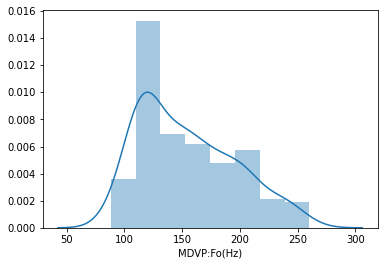

In [ ]:
eda.getDisturbutionPlot(columns[1])

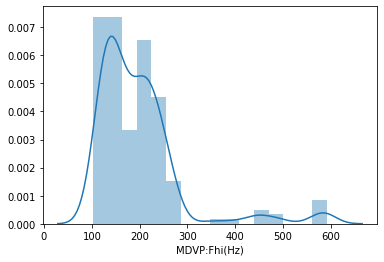

In [ ]:
eda.getDisturbutionPlot(columns[2])

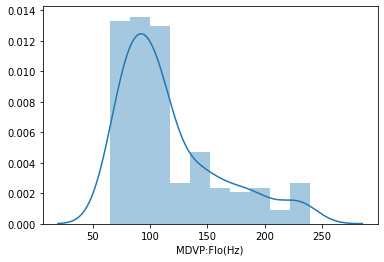

In [ ]:
eda.getDisturbutionPlot(columns[3])

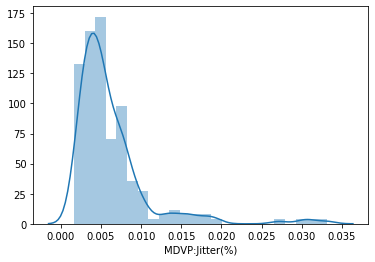

In [ ]:
eda.getDisturbutionPlot(columns[4])

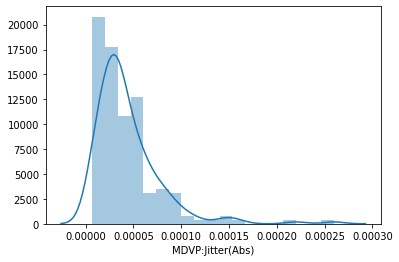

In [ ]:
eda.getDisturbutionPlot(columns[5])

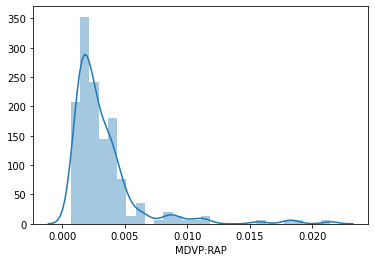

In [ ]:
eda.getDisturbutionPlot(columns[6])

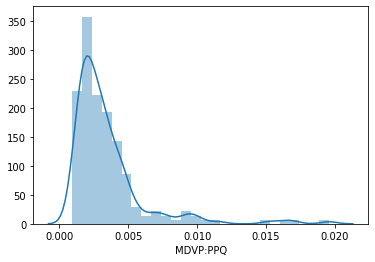

In [ ]:
eda.getDisturbutionPlot(columns[7])

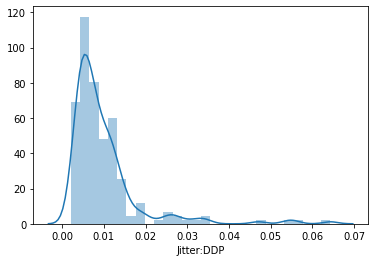

In [ ]:
eda.getDisturbutionPlot(columns[8])

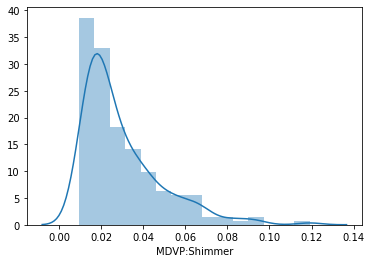

In [ ]:
eda.getDisturbutionPlot(columns[9])

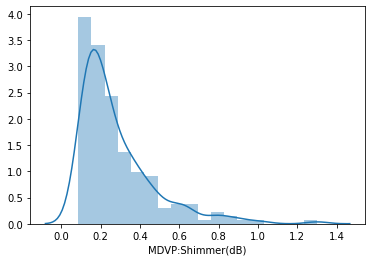

In [ ]:
eda.getDisturbutionPlot(columns[10])

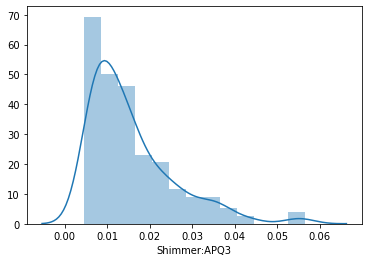

In [ ]:
eda.getDisturbutionPlot(columns[11])

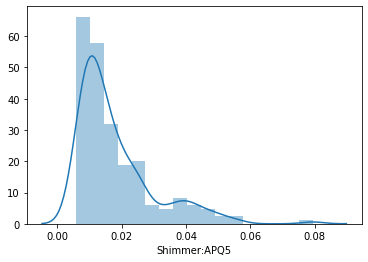

In [ ]:
eda.getDisturbutionPlot(columns[12])

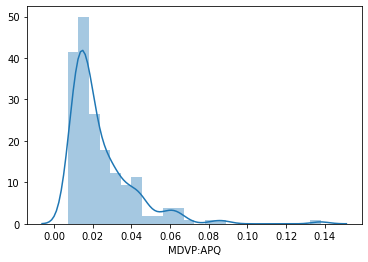

In [ ]:
eda.getDisturbutionPlot(columns[13])

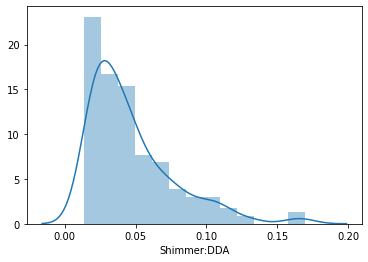

In [ ]:
eda.getDisturbutionPlot(columns[14])

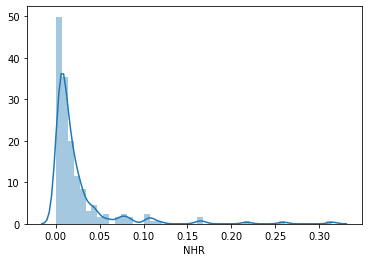

In [ ]:
eda.getDisturbutionPlot(columns[15])

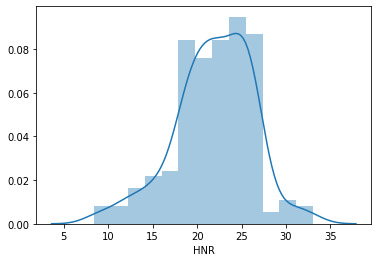

In [ ]:
eda.getDisturbutionPlot(columns[16])

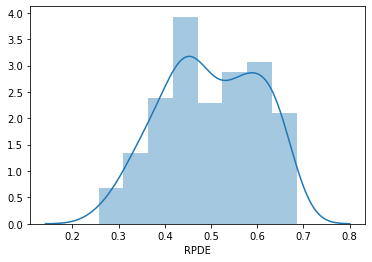

In [ ]:
eda.getDisturbutionPlot(columns[18])

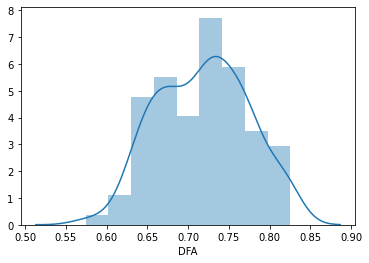

In [ ]:
eda.getDisturbutionPlot(columns[19])

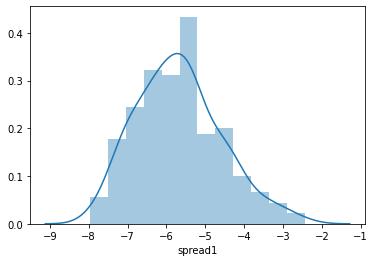

In [ ]:
eda.getDisturbutionPlot(columns[20])

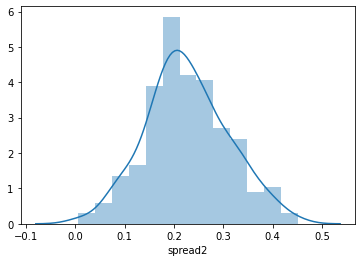

In [ ]:
eda.getDisturbutionPlot(columns[21])

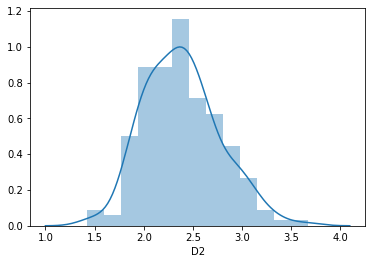

In [ ]:
eda.getDisturbutionPlot(columns[22])

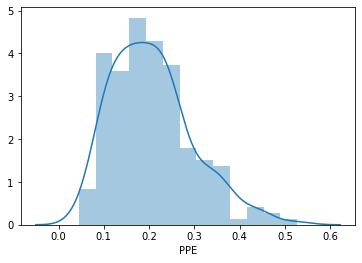

In [ ]:
eda.getDisturbutionPlot(columns[23])

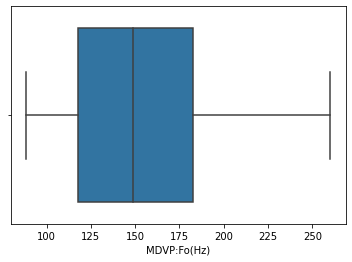

In [ ]:
eda.drawBoxPlot(columns[1])

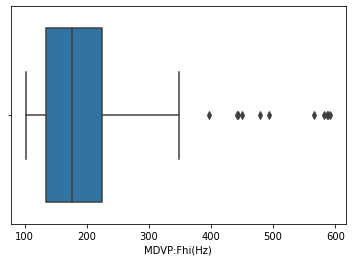

In [ ]:
eda.drawBoxPlot(columns[2])

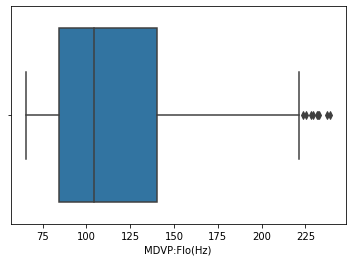

In [ ]:
eda.drawBoxPlot(columns[3])

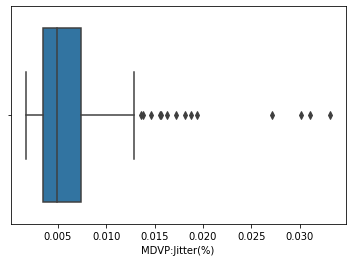

In [ ]:
eda.drawBoxPlot(columns[4])

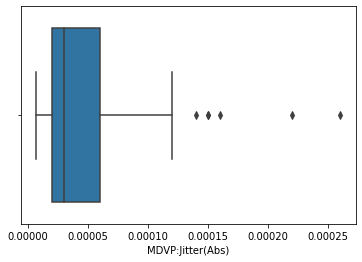

In [ ]:
eda.drawBoxPlot(columns[5])

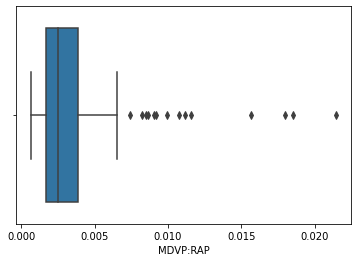

In [ ]:
eda.drawBoxPlot(columns[6])

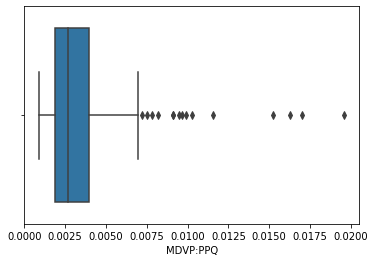

In [ ]:
eda.drawBoxPlot(columns[7])

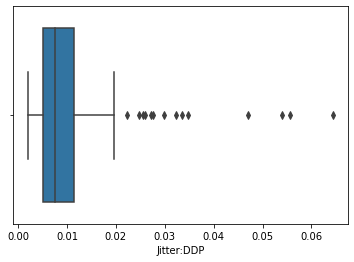

In [ ]:
eda.drawBoxPlot(columns[8])

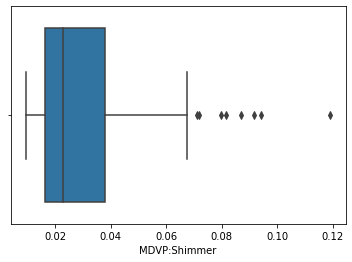

In [ ]:
eda.drawBoxPlot(columns[9])

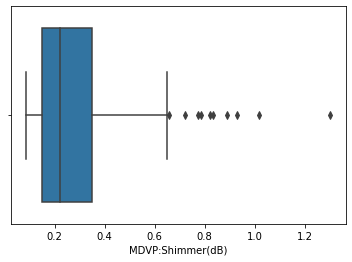

In [ ]:
eda.drawBoxPlot(columns[10])

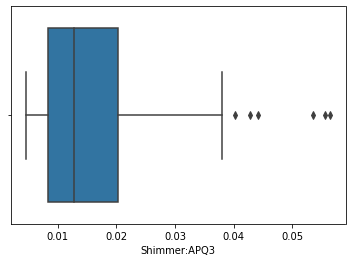

In [ ]:
eda.drawBoxPlot(columns[11])

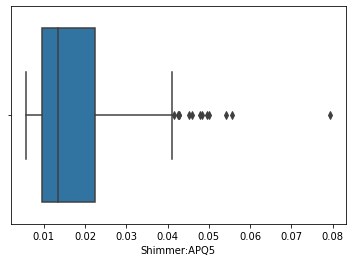

In [ ]:
eda.drawBoxPlot(columns[12])

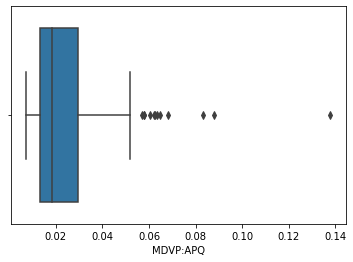

In [ ]:
eda.drawBoxPlot(columns[13])

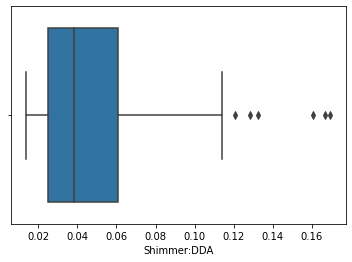

In [ ]:
eda.drawBoxPlot(columns[14])

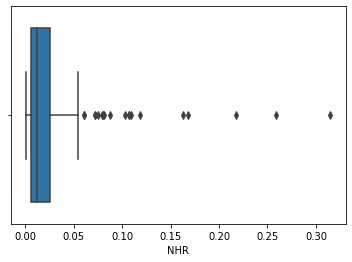

In [ ]:
eda.drawBoxPlot(columns[15])

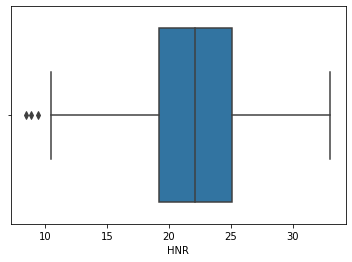

In [ ]:
eda.drawBoxPlot(columns[16])

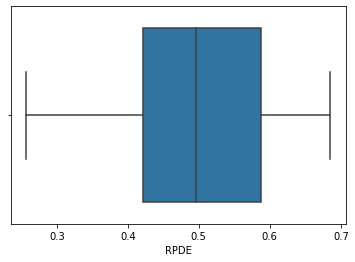

In [ ]:
eda.drawBoxPlot(columns[18])

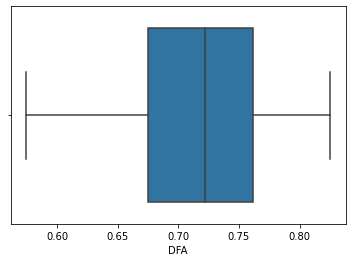

In [ ]:
eda.drawBoxPlot(columns[19])

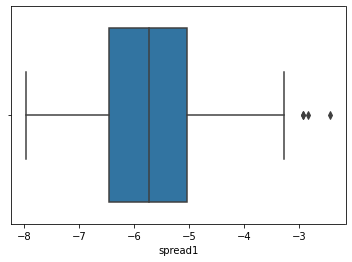

In [ ]:
eda.drawBoxPlot(columns[20])

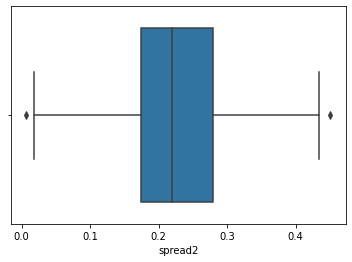

In [ ]:
eda.drawBoxPlot(columns[21])

**In the above box plot we can see there are outliers on both side**

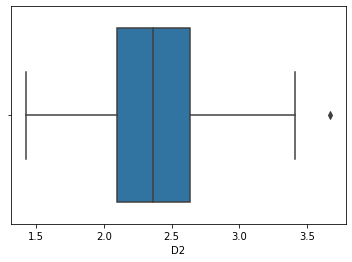

In [ ]:
eda.drawBoxPlot(columns[22])

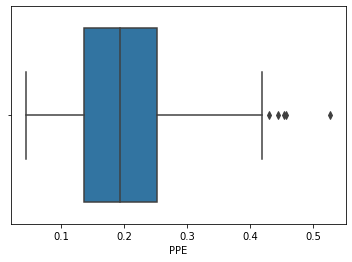

In [ ]:
eda.drawBoxPlot(columns[23])

From The above box plot we can see that there are outliers in all of the column of the dataset

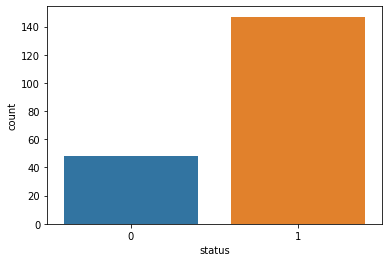

In [ ]:
sbn.countplot(eda.getDataSet()['status'])

**From the above count plot we can see that the disturbution is uneven there are many people with Parkinson's than Healthy people**

### **Bivariate data analysis**

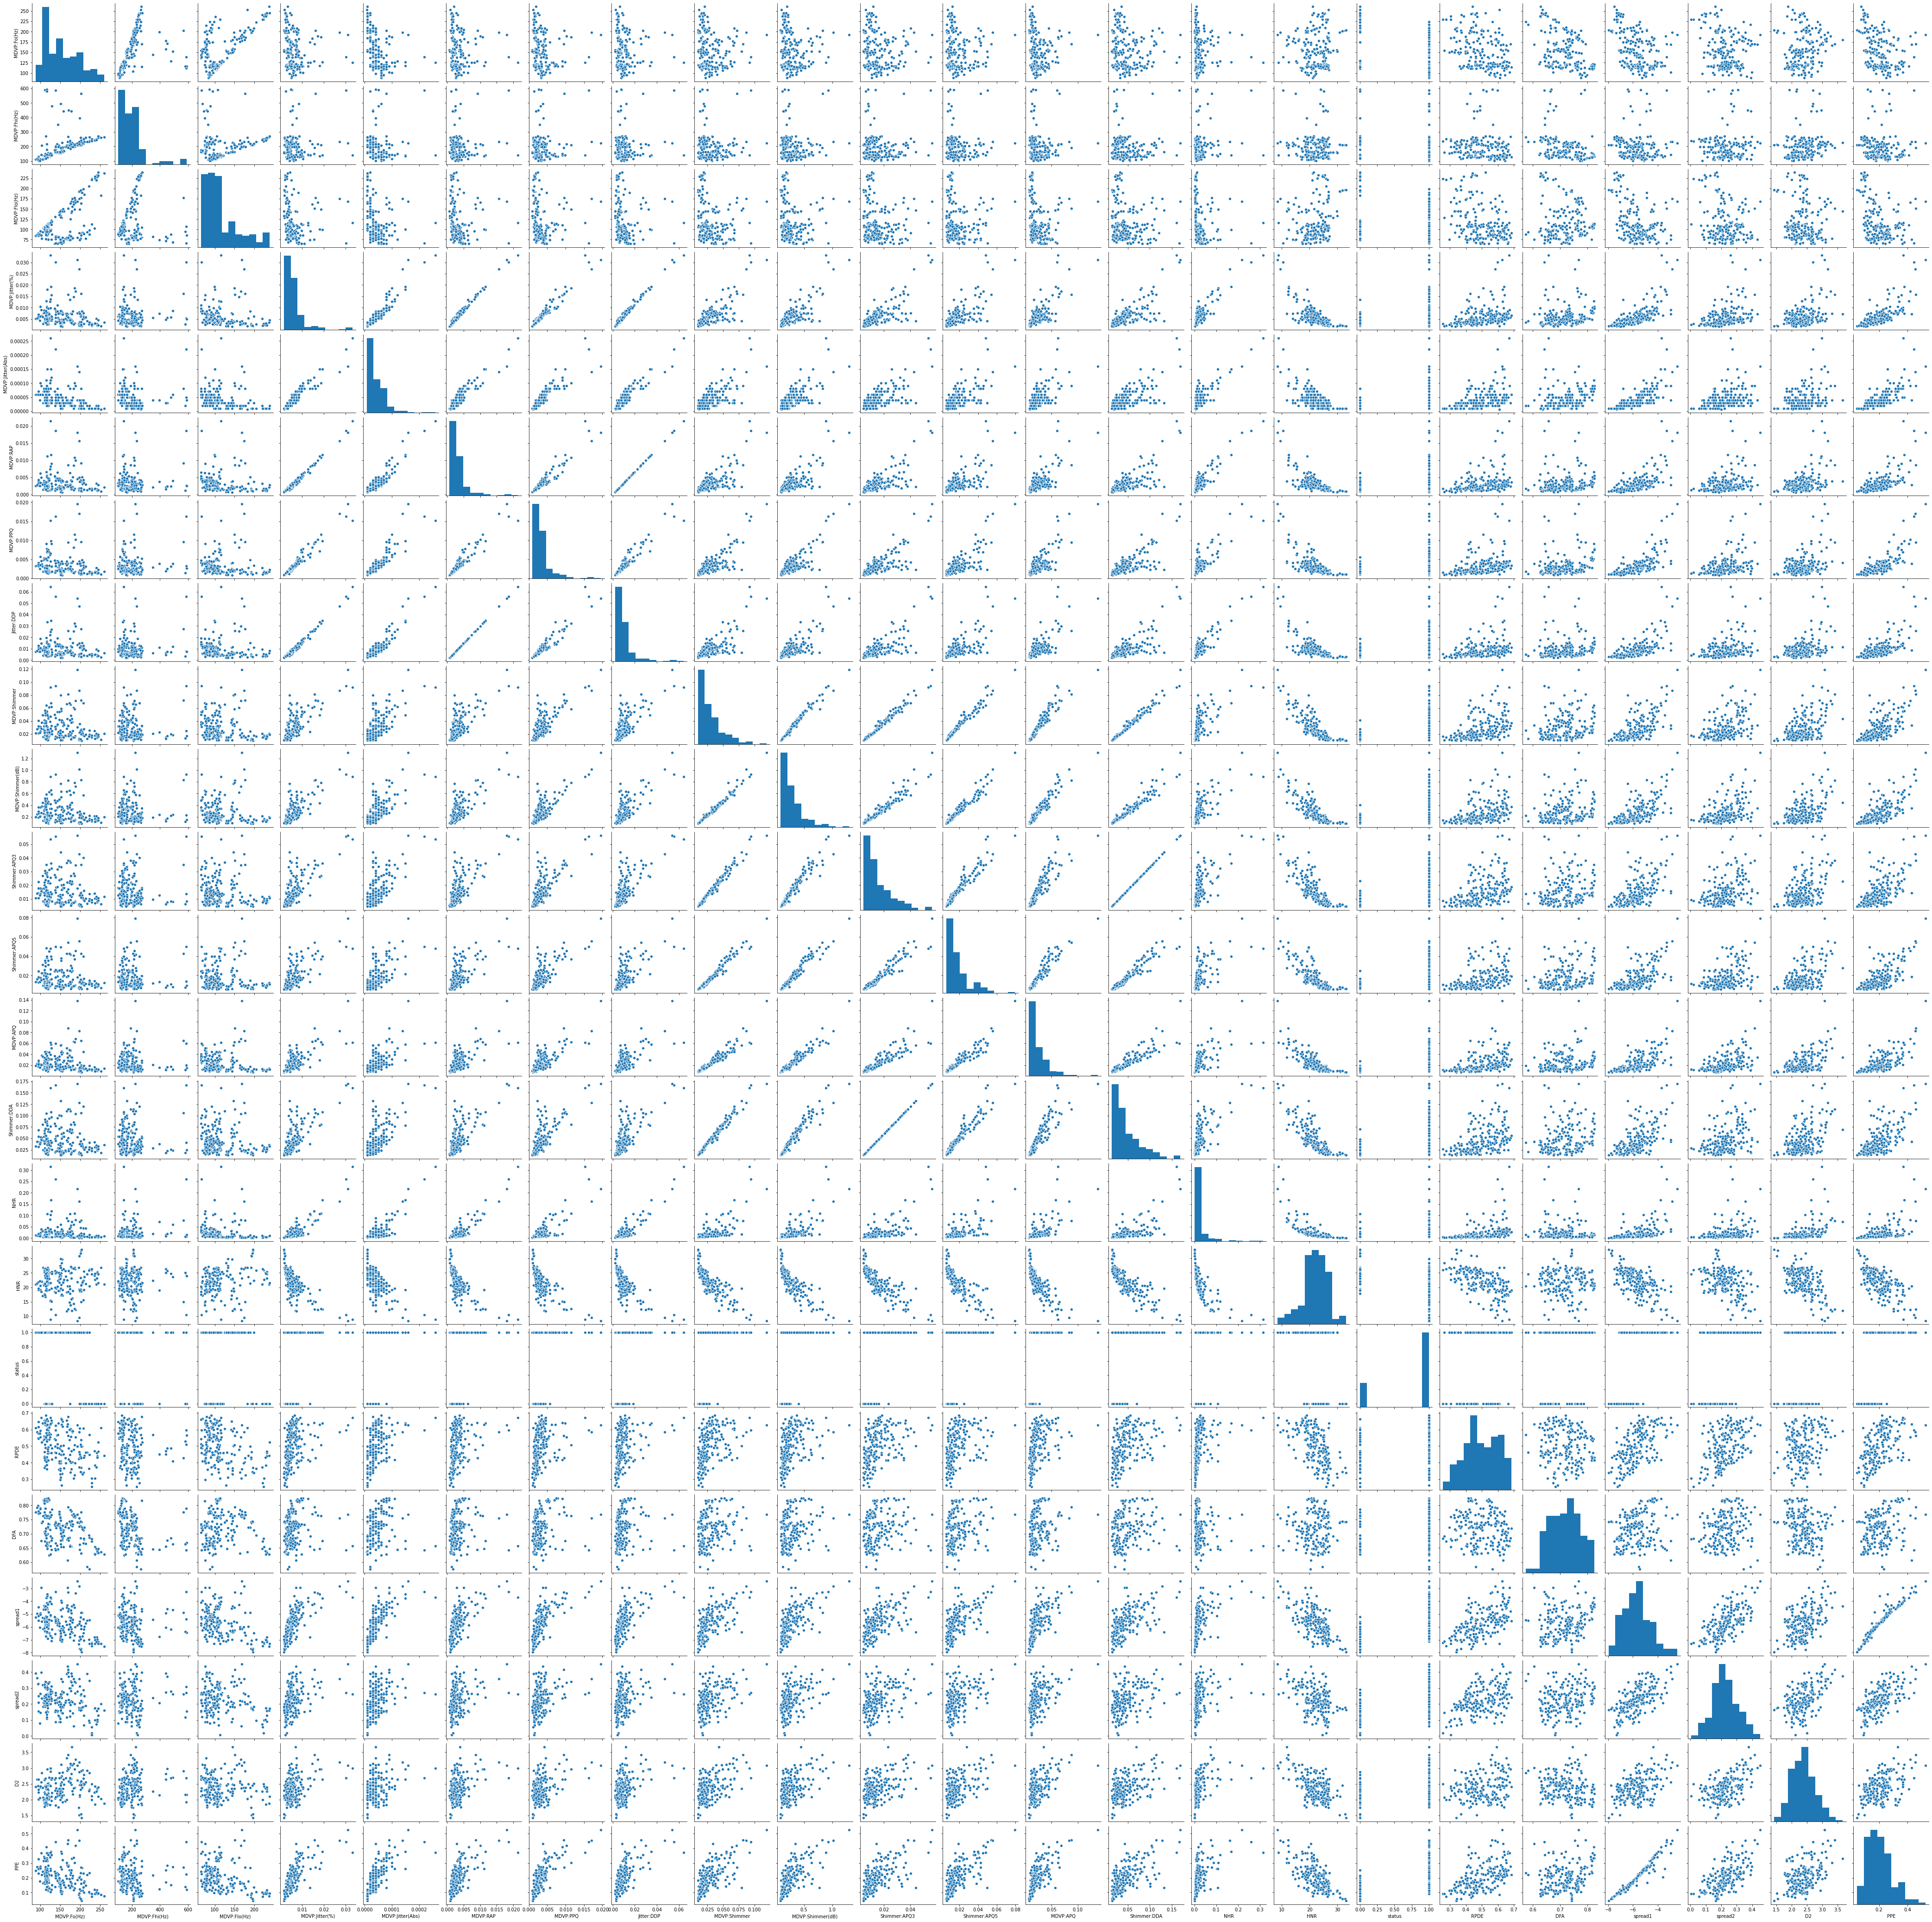

In [ ]:
eda.drawPairPlot()

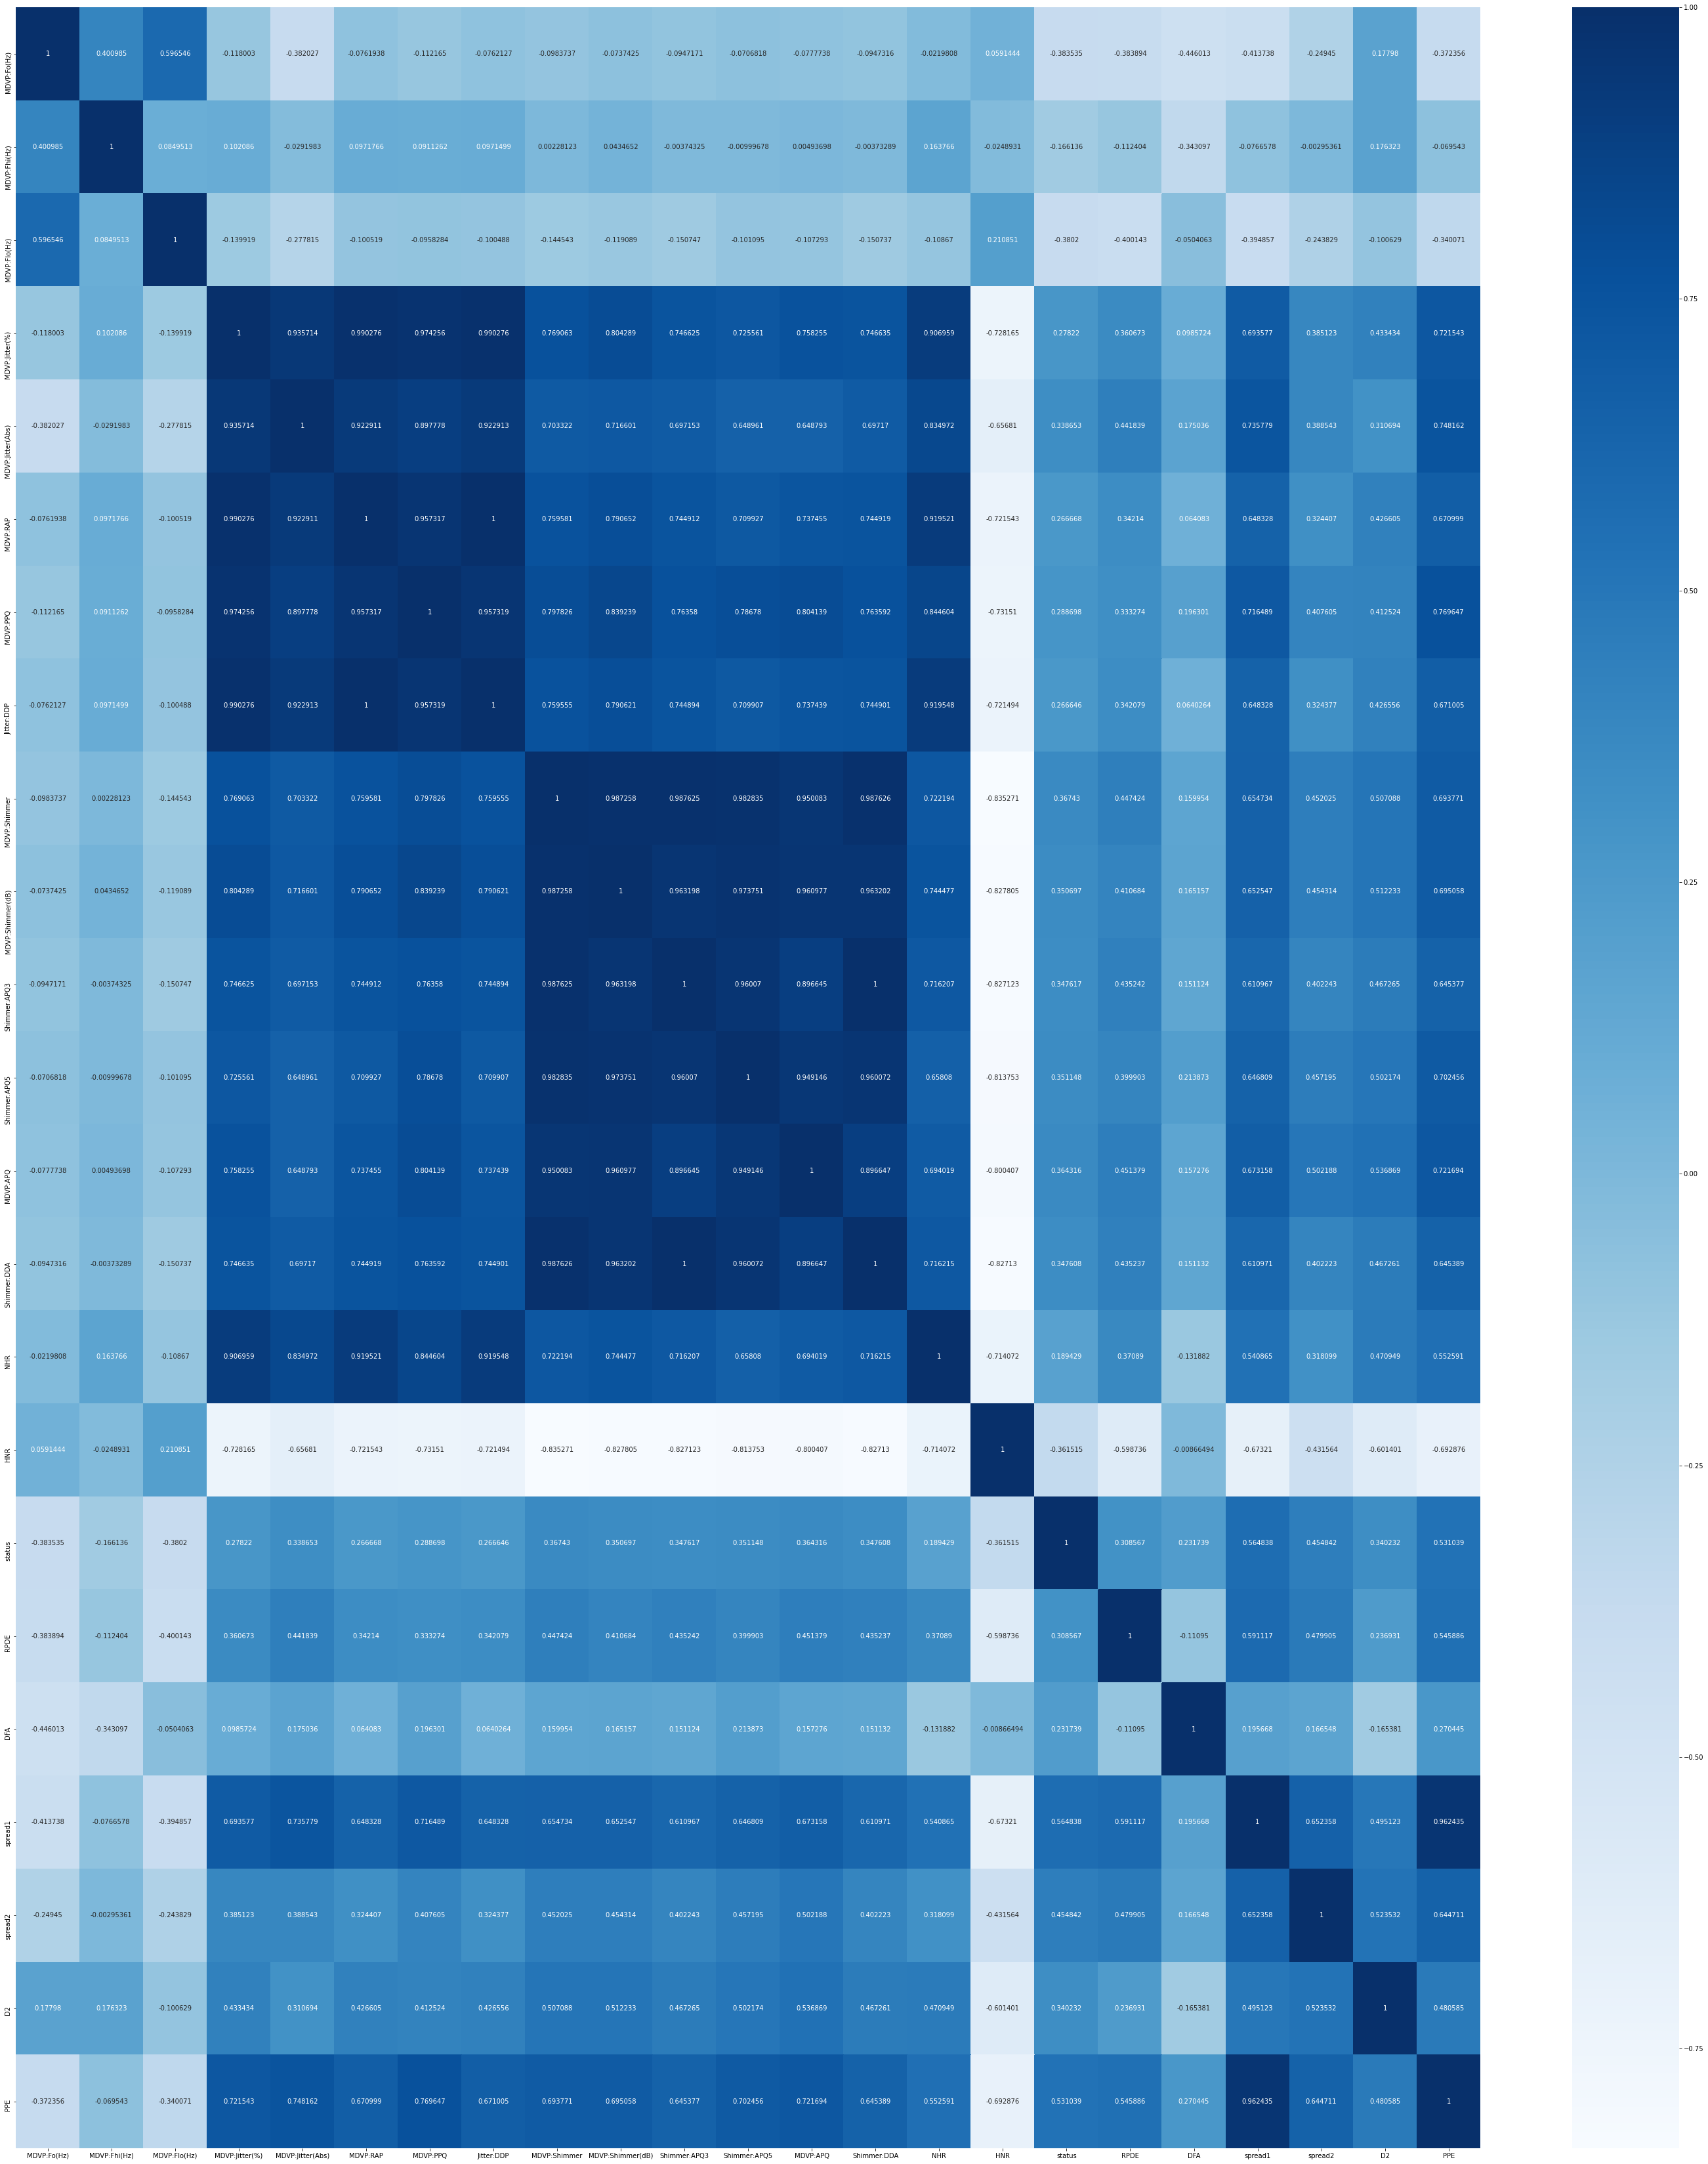

In [ ]:
eda.getCorelation(figsize=(50,60))

Form the above heatmap we can observe that the target varlble has correlation with multiple independent varibles

### **Data Preprocessing For Model Building**

In [ ]:
features = eda.getDataSet().drop(['name', 'status'], axis=1)
target = eda.getDataSet()['status']
print(f"Features Shape: {features.shape}")
print(f"Target Shape: {target.shape}")

Features Shape: (195, 22)
Target Shape: (195,)


In [ ]:
features.head(5)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  ...   spread2        D2       PPE
0      119.992       157.302        74.997  ...  0.266482  2.301442  0.284654
1      122.400       148.650       113.819  ...  0.335590  2.486855  0.368674
2      116.682       131.111       111.555  ...  0.311173  2.342259  0.332634
3      116.676       137.871       111.366  ...  0.334147  2.405554  0.368975
4      116.014       141.781       110.655  ...  0.234513  2.332180  0.410335

[5 rows x 22 columns]

In [ ]:
#Standardising Data
features_transformed = StandardScaler().fit_transform(features)
features_transformed.shape

(195, 22)

In [ ]:
target_trainsformed = target.values
target_trainsformed.shape

(195,)

### **Data split for train test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_transformed, target_trainsformed, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 22)
(59, 22)
(136,)
(59,)


### **Logistic Regration Model**

In [ ]:
logisticRegression = LogisticRegression(random_state=10)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_logistic_reg = logisticRegression.predict(X_test)

In [ ]:
print("LOGISTICS REGRESSION CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test, pred_logistic_reg))

LOGISTICS REGRESSION CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.89      0.98      0.93        43

    accuracy                           0.90        59
   macro avg       0.91      0.83      0.86        59
weighted avg       0.90      0.90      0.89        59



CONFUSION MATRIX FOR LOGISTICS REGRESSION




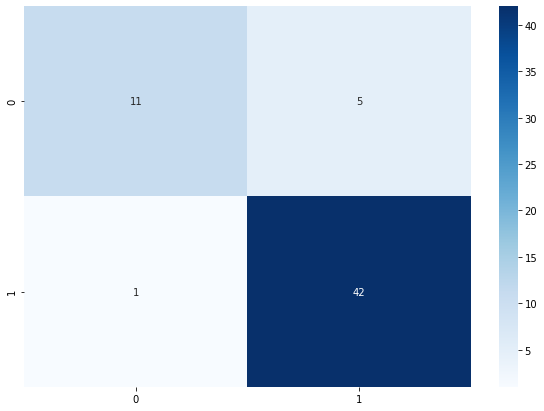

In [ ]:
print("CONFUSION MATRIX FOR LOGISTICS REGRESSION")
print("\n")
confusion_matrix_logistic_reg = confusion_matrix(y_test, pred_logistic_reg)
confusion_matrix_logistic_reg_df = pd.DataFrame(confusion_matrix_logistic_reg)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_logistic_reg_df, annot=True, cmap='Blues', fmt='g')

### **Naive Base Model**

In [ ]:
gausianNB = GaussianNB()
gausianNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gausian_nb_pred = gausianNB.predict(X_test)

In [ ]:
print("GAUSIAN NAIVE BAYES CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test, gausian_nb_pred))

GAUSIAN NAIVE BAYES CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       1.00      0.70      0.82        43

    accuracy                           0.78        59
   macro avg       0.78      0.85      0.77        59
weighted avg       0.88      0.78      0.79        59



CONFUSION MATRIX FOR GAUSIAN NAIVE BAYES




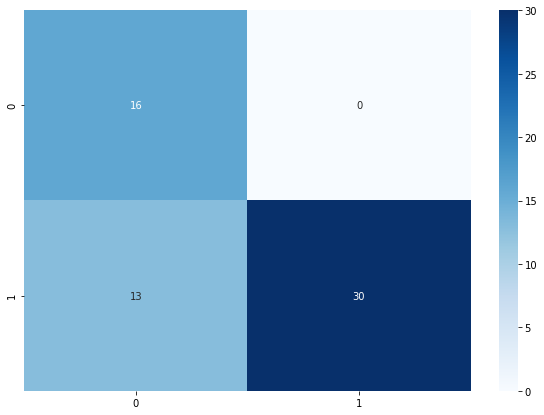

In [ ]:
print("CONFUSION MATRIX FOR GAUSIAN NAIVE BAYES")
print("\n")
confusion_matrix_gausianNB = confusion_matrix(y_test, gausian_nb_pred)
confusion_matrix_gausianNB_df = pd.DataFrame(confusion_matrix_gausianNB)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_gausianNB_df, annot=True, cmap='Blues', fmt='g')

In [ ]:
gausian_nb_pred_t = gausianNB.predict(X_train)

In [ ]:
print("GAUSIAN NAIVE BAYES CLASSIFACTION REPORT FOR TRAIN SET")
print("\n")
print(classification_report(y_train, gausian_nb_pred_t))

GAUSIAN NAIVE BAYES CLASSIFACTION REPORT FOR TRAIN SET


              precision    recall  f1-score   support

           0       0.40      0.91      0.55        32
           1       0.95      0.58      0.72       104

    accuracy                           0.65       136
   macro avg       0.67      0.74      0.64       136
weighted avg       0.82      0.65      0.68       136



CONFUSION MATRIX FOR GAUSIAN NAIVE BAYES FOR TRAIN SET




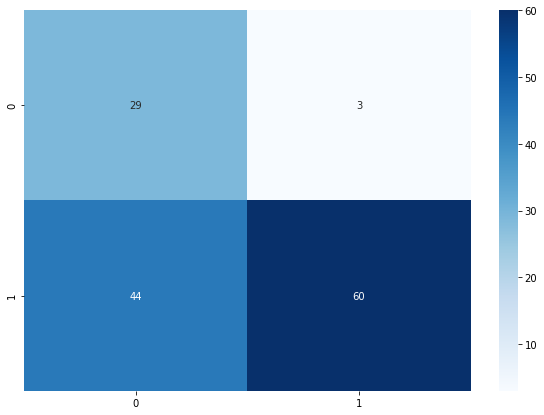

In [ ]:
print("CONFUSION MATRIX FOR GAUSIAN NAIVE BAYES FOR TRAIN SET")
print("\n")
confusion_matrix_gausianNB_t = confusion_matrix(y_train, gausian_nb_pred_t)
confusion_matrix_gausianNB_df_t = pd.DataFrame(confusion_matrix_gausianNB_t)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_gausianNB_df_t, annot=True, cmap='Blues', fmt='g')

### **KNN Model**

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn3.predict(X_test)
print("KNN CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test, knn_pred))

KNN CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.85      0.69      0.76        16
           1       0.89      0.95      0.92        43

    accuracy                           0.88        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.88      0.88      0.88        59



CONFUSION MATRIX FOR KNN




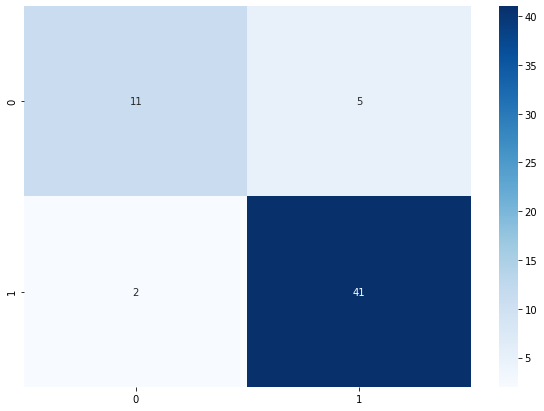

In [ ]:
print("CONFUSION MATRIX FOR KNN")
print("\n")
confusion_matrix_knn = confusion_matrix(y_test, knn_pred)
confusion_matrix_knn_df = pd.DataFrame(confusion_matrix_knn)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_knn_df, annot=True, cmap='Blues', fmt='g')

### **SVM Modle**

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print("SVC CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test, svc_pred))

SVC CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.83      1.00      0.91        43

    accuracy                           0.85        59
   macro avg       0.91      0.72      0.76        59
weighted avg       0.87      0.85      0.82        59



CONFUSION MATRIX FOR SVC




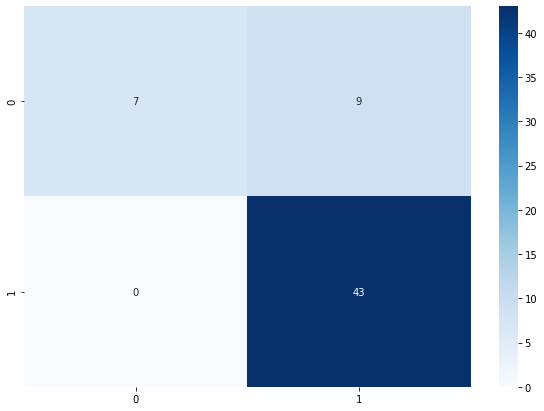

In [ ]:
print("CONFUSION MATRIX FOR SVC")
print("\n")
confusion_matrix_svc = confusion_matrix(y_test, svc_pred)
confusion_matrix_svc_df = pd.DataFrame(confusion_matrix_svc)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_svc_df, annot=True, cmap='Blues', fmt='g')

### **Training Ensemble Model**

**Training Randomforest**

In [ ]:
random_forest = RandomForestClassifier(random_state=10, n_estimators=60)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
random_forest_pred = random_forest.predict(X_test)

In [ ]:
print("RANDOM FOREST CLASSIFACTION REPORT")
print("\n")
print(classification_report(y_test, random_forest_pred))

RANDOM FOREST CLASSIFACTION REPORT


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        43

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



CONFUSION MATRIX FOR RANDOM FOREST




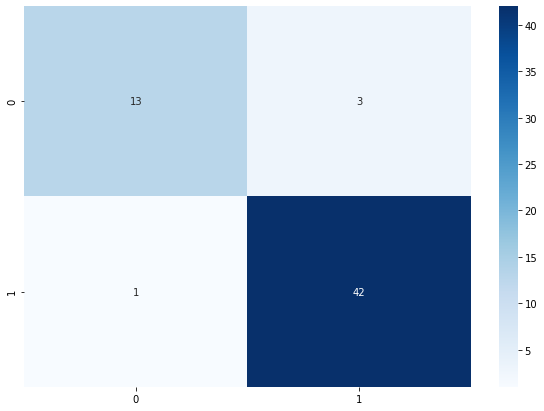

In [ ]:
print("CONFUSION MATRIX FOR RANDOM FOREST")
print("\n")
confusion_matrix_rf = confusion_matrix(y_test, random_forest_pred)
confusion_matrix_rf_df = pd.DataFrame(confusion_matrix_rf)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_rf_df, annot=True, cmap='Blues', fmt='g')

**Training Stacked Model**

In [ ]:
estimators = [
              ('rf', random_forest),
              ('svc', svc),
              ('gnb', gausianNB),
              ('knn', knn3)
             ] 
meta_model = logisticRegression

In [ ]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [ ]:
pred_stacking_model = stacking_model.predict(X_test)
print(f'STACKING MODEL CLASSIFICATION REPORT:\n {classification_report(y_test, pred_stacking_model)}')

STACKING MODEL CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.91      0.98      0.94        43

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.92      0.92      0.91        59



CONFUSION MATRIX FOR STACKING MODEL




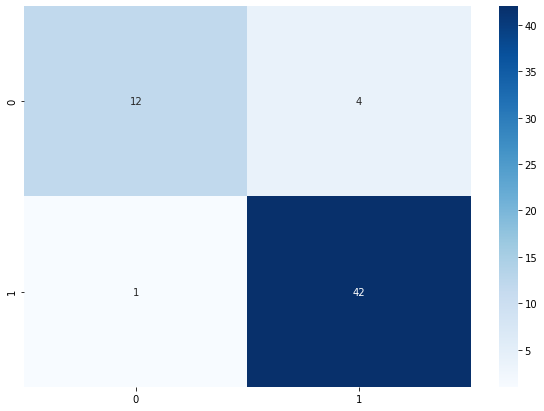

In [ ]:
print("CONFUSION MATRIX FOR STACKING MODEL")
print("\n")
confusion_matrix_sm = confusion_matrix(y_test, pred_stacking_model)
confusion_matrix_sm_df = pd.DataFrame(confusion_matrix_sm)
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix_sm_df, annot=True, cmap='Blues', fmt='g')

### **Model Classification Summary Table**

**Classification Report Table**

Model Name | accuracy | precision 0| precision 1| recall 0| recall 1| f1-score 0 | f1-score 1
--- | --- | --- | --- | --- | --- | --- | --- 
LOGISTICS REGRESSION| 0.90 | 0.92 | 0.89 | 0.69 | 0.98 | 0.79 | 0.93
NAIVE BAYES| 0.78 | 0.55 | 1.00 | 1.00 | 0.70 | 0.71| 0.82 
KNN  | 0.88 | 0.85| 0.89 | 0.69 | 0.95 | 0.76 | 0.92
SVM  | 0.85 | 1.00 | 0.83 | 0.44 | 1.00 | 0.61 | 0.91
RANDOMFOREST | 0.93 | 0.93 | 0.93 | 0.81 | 0.98 | 0.87 | 0.95
STACKING MODEL | 0.92 | 0.92 | 0.91 | 0.75 | 0.98 | 0.83 | 0.94

**Conclusion:** From the above classification table We can observe that **RANDOMFOREST Classifier** has best scores so Random forest is consider to be the best model that fits this data. After Random forest other best fit model is **StackingClassifier**